<a href="https://colab.research.google.com/github/Vitalyastiy/cheat-python/blob/main/viz/.Pandas_Sea_Plotly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://pythonist.ru/kak-sozdavat-naglyadnye-grafiki-v-python-bystro-krasivo-i-ochen-krasivo/amp/

In [24]:
# загружаем данные
import pandas as pd
import plotly
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/FBosler/AdvancedPlotting/master/combined_set.csv')
# присваиваем метки каждому году
data['Mean Log GDP per capita']  = data.groupby('Year')['Log GDP per capita'].transform(
    pd.qcut,
    q=5,
    labels=(['Lowest','Low','Medium','High','Highest'])
)

<Axes: ylabel='Frequency'>

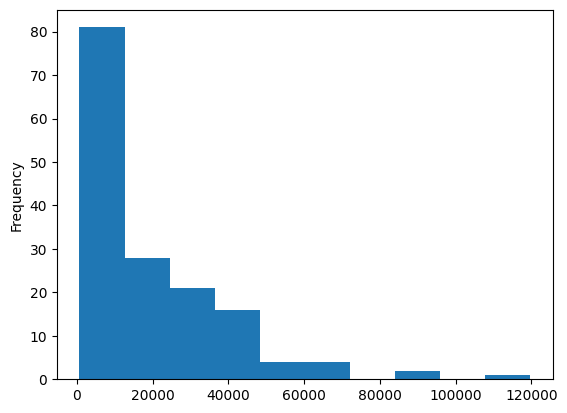

In [ ]:
np.exp(data[data['Year']==2018]['Log GDP per capita']).plot( #значение 'Log GDP per capita' представляет логарифм натуральный от GDP per capita. Вычисление экспоненты от значения 'Log GDP per capita' приводит к восстановлению исходного значения GDP per capita, которое уже не будет находиться на логарифмической шкале. Таким образом, построение гистограммы распределения экспоненты значения 'Log GDP per capita' позволяет оценить распределение исходных значений GDP per capita.
    kind='hist'
)

kind: Pandas должна знать, какого типа график вы хотите строить.
 Возможны следующие варианты: hist, bar, barh, scatter, area, kde, line, box, hexbin, pie.

figsize: Позволяет переопределить значение размера, заданное по умолчанию (6 дюймов в ширину и 4 дюйма в высоту). Данный параметр принимает на вход кортеж, например figsize=(12,8), что я часто использую.

title: Добавляет к графику заголовок. Как правило, я его использую, чтобы кратко описать, что происходит на графике, дабы потом это можно было быстро понять. Данный параметр принимает на вход строку.

bins: Позволяет переопределить ширину областей гистограммы. Данный параметр принимает на вход список или подобную ему последовательность, например bins=np.arange(2,8,0.25).

xlim/ylim: Позволяет переопределить максимальные и минимальные значения осей x и y. Оба параметра принимают на вход кортежи, например xlim=(0,5).

Вертикальная гистограмма

In [ ]:
data

Year Country name ISO3 Continent  Life Ladder  Log GDP per capita  \
0     2007  Afghanistan  AFG      Asia     3.723590            7.168690   
1     2008  Afghanistan  AFG      Asia     3.723590            7.168690   
2     2009  Afghanistan  AFG      Asia     4.401778            7.333790   
3     2010  Afghanistan  AFG      Asia     4.758381            7.386629   
4     2011  Afghanistan  AFG      Asia     3.831719            7.415019   
...    ...          ...  ...       ...          ...                 ...   
1891  2014     Zimbabwe  ZWE    Africa     4.184451            7.562753   
1892  2015     Zimbabwe  ZWE    Africa     3.703191            7.556052   
1893  2016     Zimbabwe  ZWE    Africa     3.735400            7.538829   
1894  2017     Zimbabwe  ZWE    Africa     3.638300            7.549491   
1895  2018     Zimbabwe  ZWE    Africa     3.616480            7.553395   

      Social support  Healthy life expectancy at birth  \
0           0.450662                         50.799999   
1           0.450662                         50.799999   
2           0.552308                         51.200001   
3           0.539075                         51.599998   
4           0.521104                         51.919998   
...              ...                               ...   
1891        0.765839                         52.380001   
1892        0.735800                         53.799999   
1893        0.768425                         54.400002   
1894        0.754147                         55.000000   
1895        0.775388                         55.599998   

      Freedom to make life choices  Generosity  Perceptions of corruption  \
0                         0.718114    0.177889                   0.881686   
1                         0.718114    0.177889                   0.881686   
2                         0.678896    0.200178                   0.850035   
3                         0.600127    0.134353                   0.706766   
4                         0.495901    0.172137                   0.731109   
...                            ...         ...                        ...   
1891                      0.642034   -0.048634                   0.820217   
1892                      0.667193   -0.097354                   0.810457   
1893                      0.732971   -0.068105                   0.723612   
1894                      0.752826   -0.069670                   0.751208   
1895                      0.762675   -0.038384                   0.844209   

      Positive affect  Negative affect  Confidence in national government  \
0            0.517637         0.258195                           0.612072   
1            0.517637         0.258195                           0.612072   
2            0.583926         0.237092                           0.611545   
3            0.618265         0.275324                           0.299357   
4            0.611387         0.267175                           0.307386   
...               ...              ...                                ...   
1891         0.725214         0.239111                           0.566209   
1892         0.715079         0.178861                           0.590012   
1893         0.737636         0.208555                           0.699344   
1894         0.806428         0.224051                           0.682647   
1895         0.710119         0.211726                           0.550508   

      Democratic Quality  Delivery Quality  Gapminder Life Expectancy  \
0              -1.929690         -1.655084                       55.2   
1              -1.929690         -1.655084                       55.2   
2              -2.044093         -1.635025                       55.7   
3              -1.991810         -1.617176                       56.2   
4              -1.919018         -1.616221                       56.7   
...                  ...               ...                        ...   
1891           -0.985267         -1.484067     

<Axes: xlabel='Country name'>

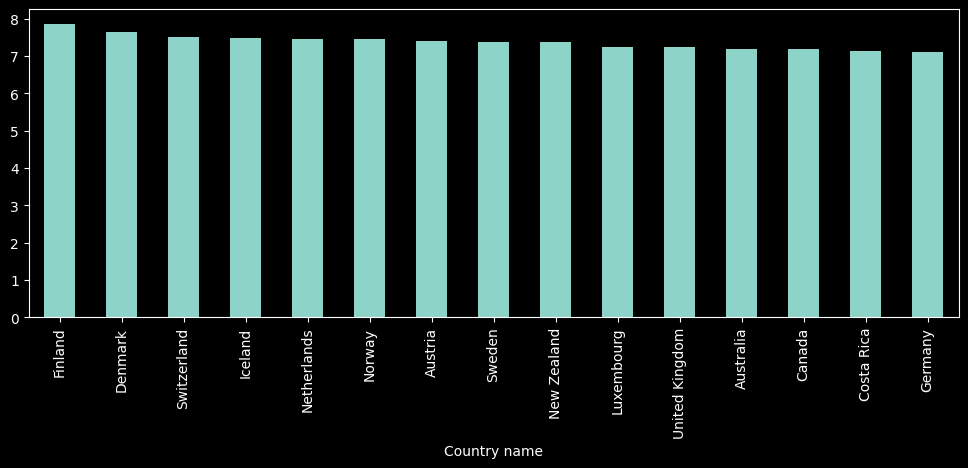

In [ ]:
data[data['Year'] == 2018].set_index('Country name')['Life Ladder'].nlargest(15).plot(  #nsmallest - наименьшие значения
    kind='bar',
    figsize=(12,4)
)

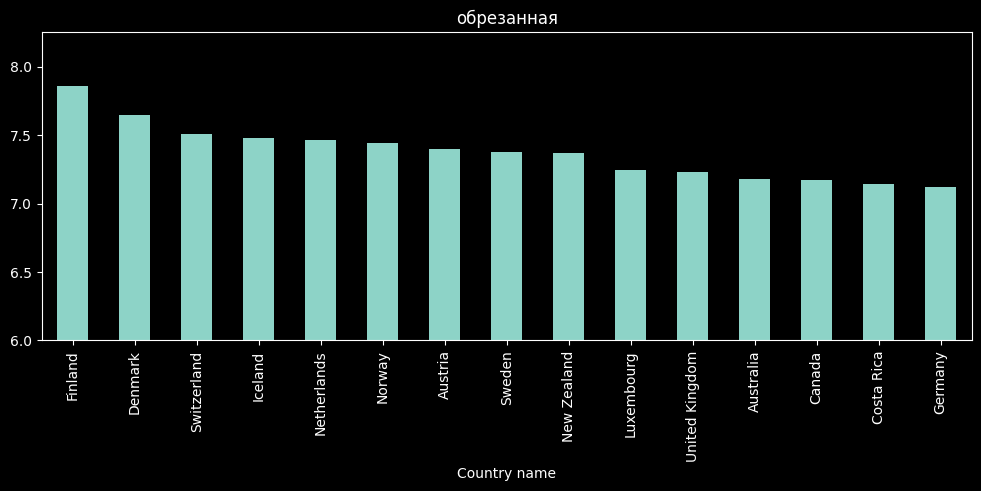

In [ ]:
df = data[data['Year'] == 2018].set_index('Country name')['Life Ladder'].nlargest(15)

ax = df.plot(kind='bar', figsize=(12,4))
ax.set_ylim(6, ax.get_ylim()[1])
ax.set_title('обрезанная')
plt.show()

Горизонтальная гистограмма

<Axes: ylabel='Continent'>

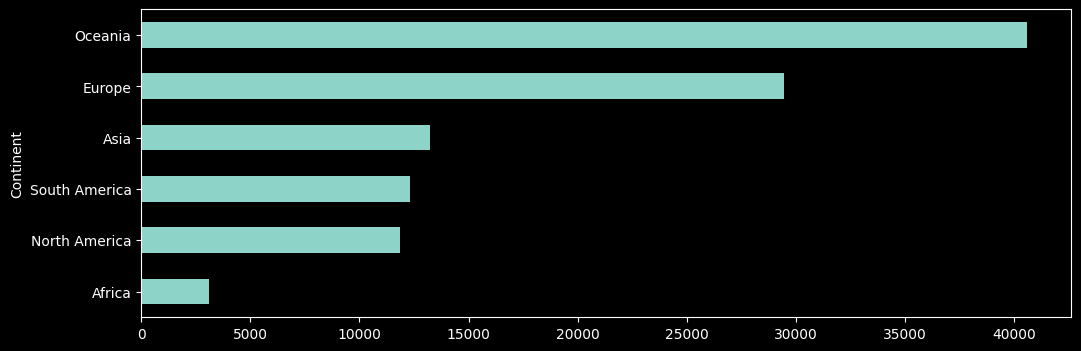

In [ ]:
np.exp(data[
    data['Year'] == 2018
].groupby('Continent')['Log GDP per capita']\
       .mean()).sort_values().plot(
    kind='barh',
    figsize=(12,4)
)

Ящик с усами (Box plot)


<Axes: >

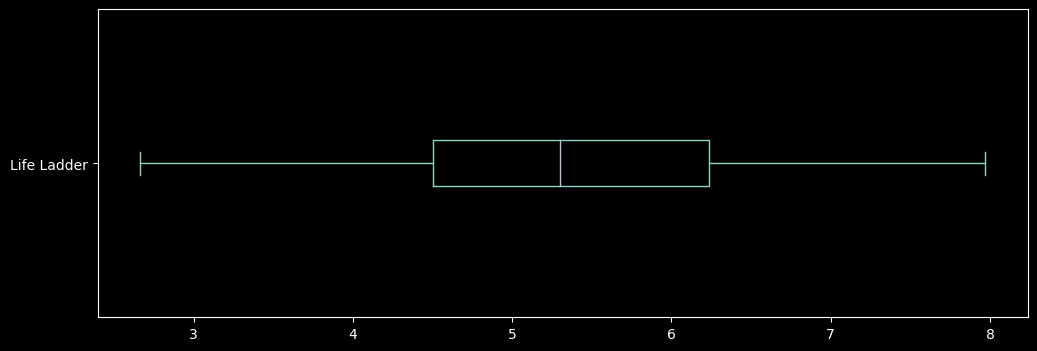

In [ ]:
data['Life Ladder'].plot(
    kind='box',
    vert=False, #перевернуть боксплот
    figsize=(12,4))

Точечный график (диаграмма рассеяния)


<Axes: xlabel='Healthy life expectancy at birth', ylabel='Gapminder Life Expectancy'>

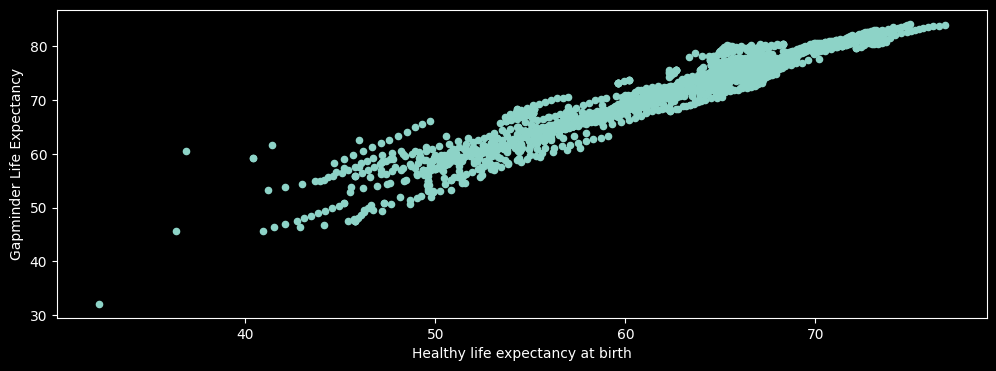

In [ ]:
data[['Healthy life expectancy at birth','Gapminder Life Expectancy']].plot(
    kind='scatter',
    x='Healthy life expectancy at birth',
    y='Gapminder Life Expectancy',
    figsize=(12,4)
)

#Гексбиновая диаграмма

Чтение диаграммы hexbin осуществляется следующим образом:

1. Каждая шестиугольная ячейка представляет комбинацию значений переменных "Healthy life expectancy at birth" и "Generosity".
2. Цвет каждой ячейки указывает на количество точек данных, попавших в эту ячейку. Темнее цвет означает большее количество точек.
3. Вы можете анализировать плотность и распределение данных, исходя из количества ячеек определенного цвета.

Таким образом, диаграмма hexbin помогает визуализировать двумерное распределение данных и выявить возможные паттерны или взаимосвязи между переменными.

<Axes: xlabel='Healthy life expectancy at birth', ylabel='Generosity'>

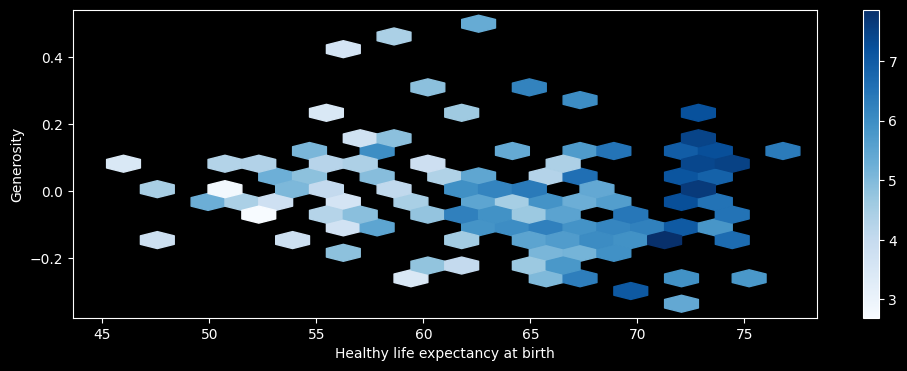

In [ ]:
data[data['Year'] == 2018].plot(
    kind='hexbin',
    x='Healthy life expectancy at birth',
    y='Generosity',
    C='Life Ladder',
    gridsize=20,
    figsize=(12,4),
    cmap="Blues", # по умолчанию зеленый
    sharex=False # необходимо, чтобы не допустить ошибок
)

Круговая диаграмма


<Axes: ylabel='Gapminder Population'>

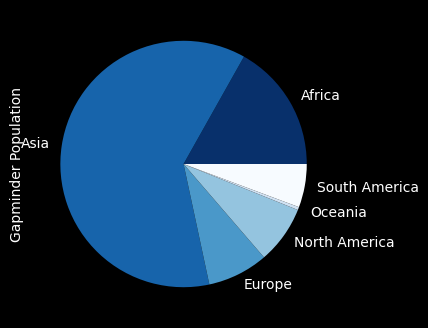

In [ ]:
data[data['Year'] == 2018].groupby(
    ['Continent']
)['Gapminder Population'].sum().plot(
    kind='pie',
    figsize=(12,4),
    cmap="Blues_r", # по умолчанию оранжевый
)
#2018: Круговая диаграмма показывает количество жителей планеты с разбивкой по континентам.

Диаграмма с накоплением


<Axes: xlabel='Year'>

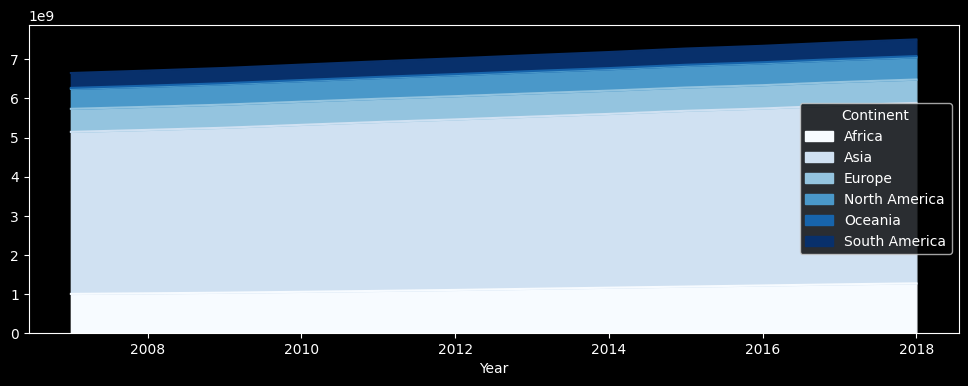

In [ ]:
data.groupby(
    ['Year','Continent']
)['Gapminder Population'].sum().unstack().plot(
    kind='area',
    figsize=(12,4),
    cmap="Blues", # по умолчанию оранжевый
)
#Количество жителей планеты растет.

Линейный график


<Axes: xlabel='Year'>

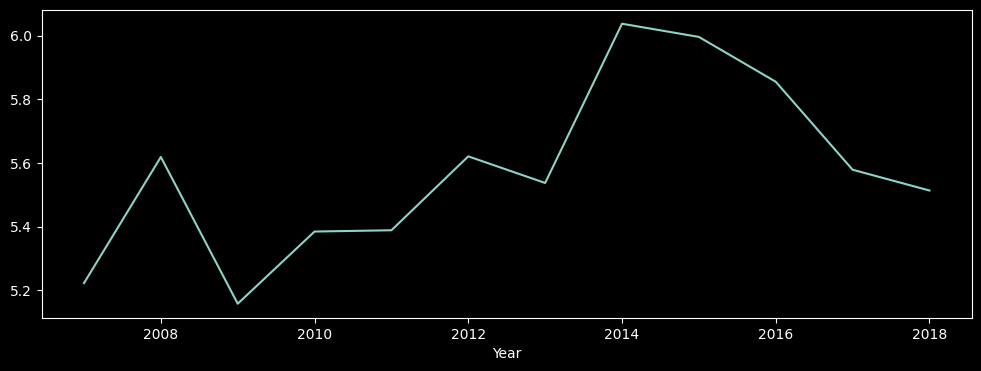

In [3]:
data[
    data['Country name'] == 'Russia'
].set_index('Year')['Life Ladder'].plot(
    kind='line',
    figsize=(12,4)
)
#Динамика счастья в Russia.

Seaborn

In [5]:
#настройка
sns.reset_defaults()
sns.set(
    rc={'figure.figsize':(7,5)},
    style="white" # nicer layout
)

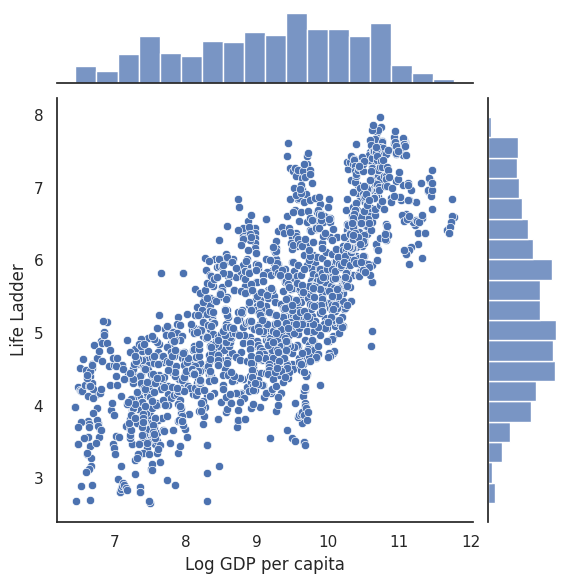

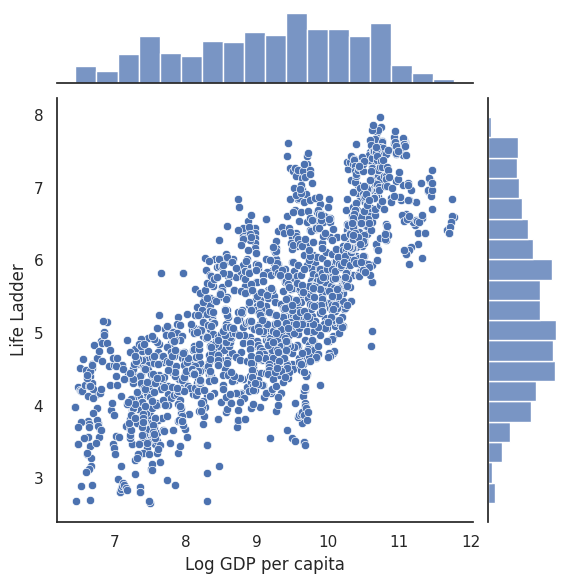

In [7]:
sns.jointplot(
    x='Log GDP per capita',
    y='Life Ladder',
    data=data,
    kind='scatter' # or 'kde' or 'hex'
)
plt.show()
#Совестный график в Seaborn.
#Точечная диаграмма, двумерная ядерная оценка плотности распределения вероятности и гексабиновая диаграмма в центре, и частные распределения случайных величин справа и сверху.

Точечная диаграмма
Точечная диаграмма — это отличный способ визуализации совместной плотности распределения двух случайных величин. Мы можем добавить третью переменную, выражая ее при помощи оттенка цвета, а также и четвертую, визуализируя ее при помощи размера точки.


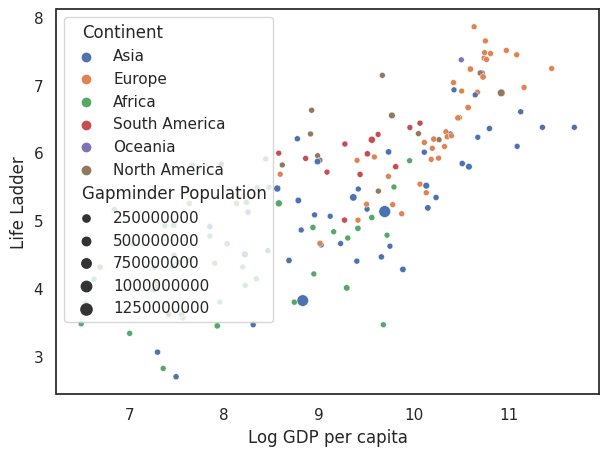

In [10]:
sns.scatterplot(
    x='Log GDP per capita',
    y='Life Ladder',
    data=data[data['Year'] == 2018],
    hue='Continent',
    size='Gapminder Population'
)
# параметры hue и size не обязательны
plt.show()

Скрипичный график (Violin plot)
Скрипичный график — это фактически комбинация двух других графиков, ящика с усами (box plot) и графика ядерной оценки плотности вероятности. Он показывает плотность распределения количественной переменной в зависимости от значений категориальной переменной так, чтобы их можно было сравнить между собой.


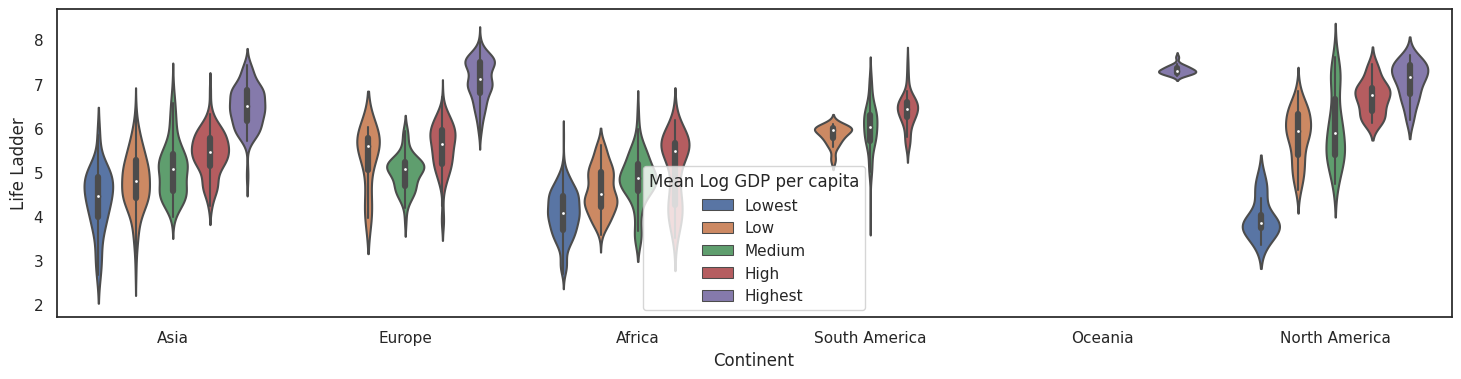

In [13]:
sns.set(
    rc={'figure.figsize':(18,4)},
    style="white"
)
sns.violinplot(
    x='Continent',
    y='Life Ladder',
    hue='Mean Log GDP per capita',
    data=data
)
#sns.despine()
plt.show()

Матричная диаграмма рассеяния
Матричная диаграмма рассеяния представляет собой все возможные попарные диаграммы рассеяния, представленные в виде большой квадратной матрицы. Я обычно нахожу этот вид графика несколько информационно перегруженным, но как бы то ни было, он может помочь найти закономерности.


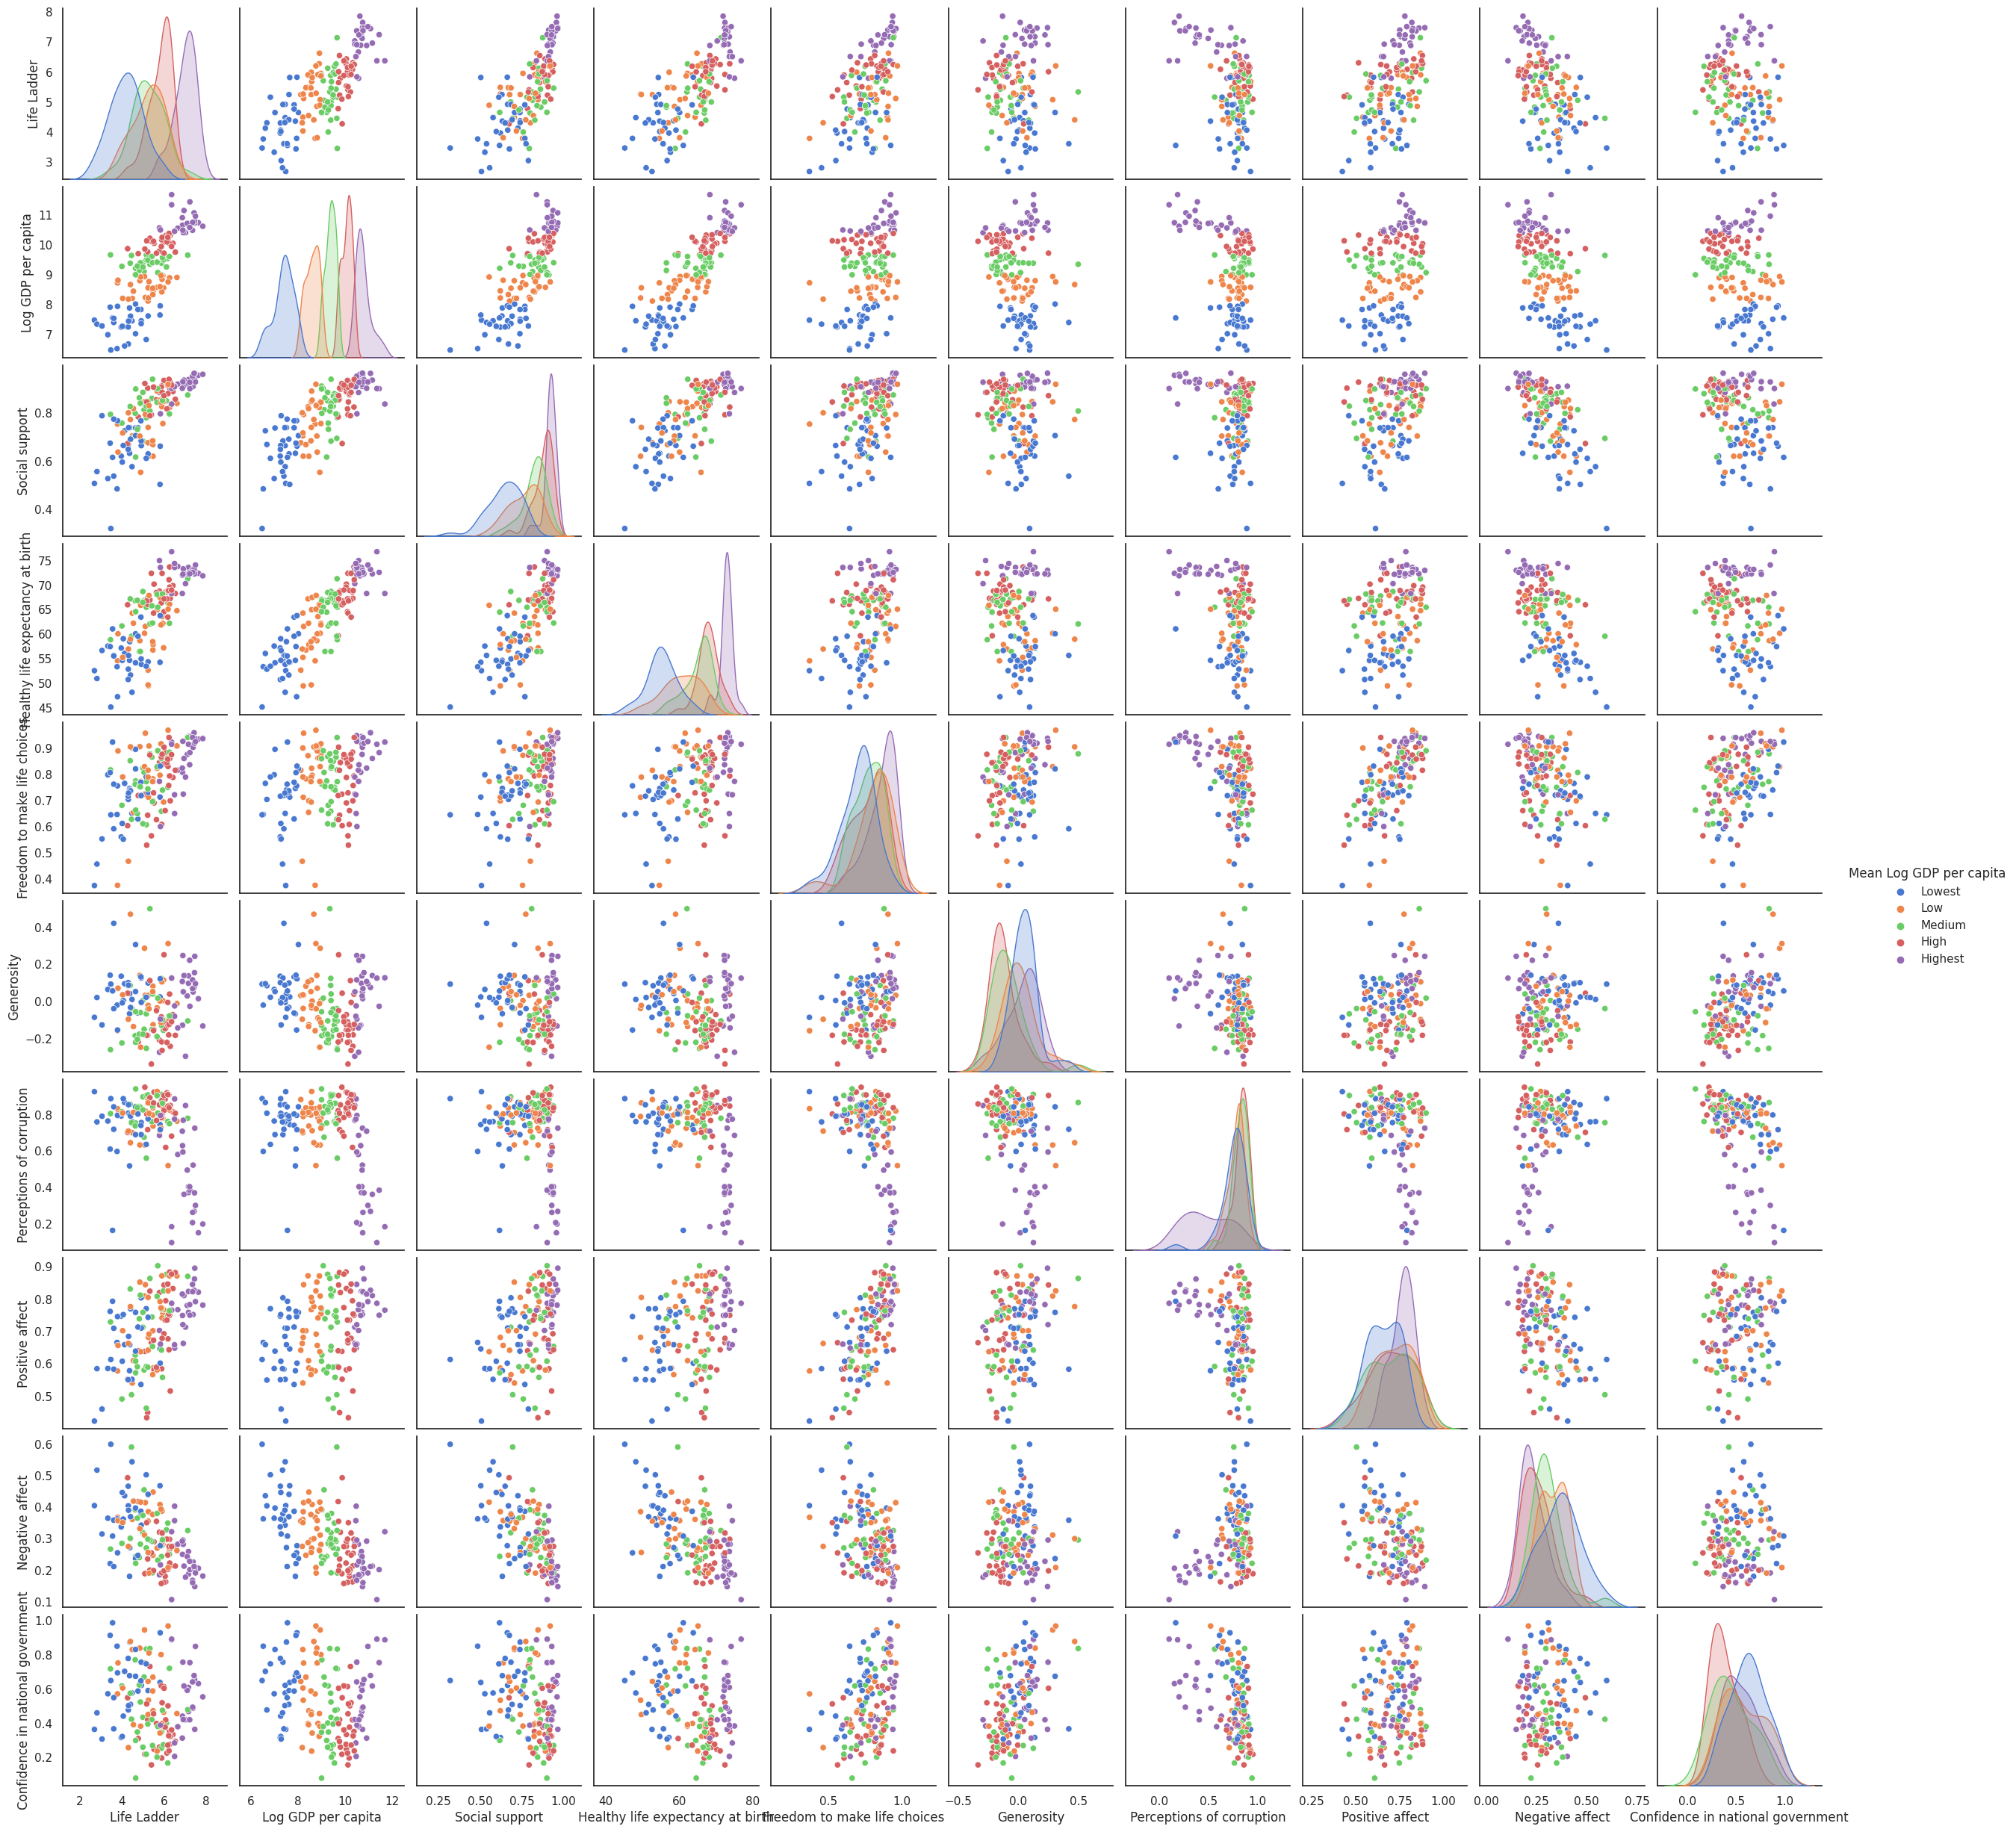

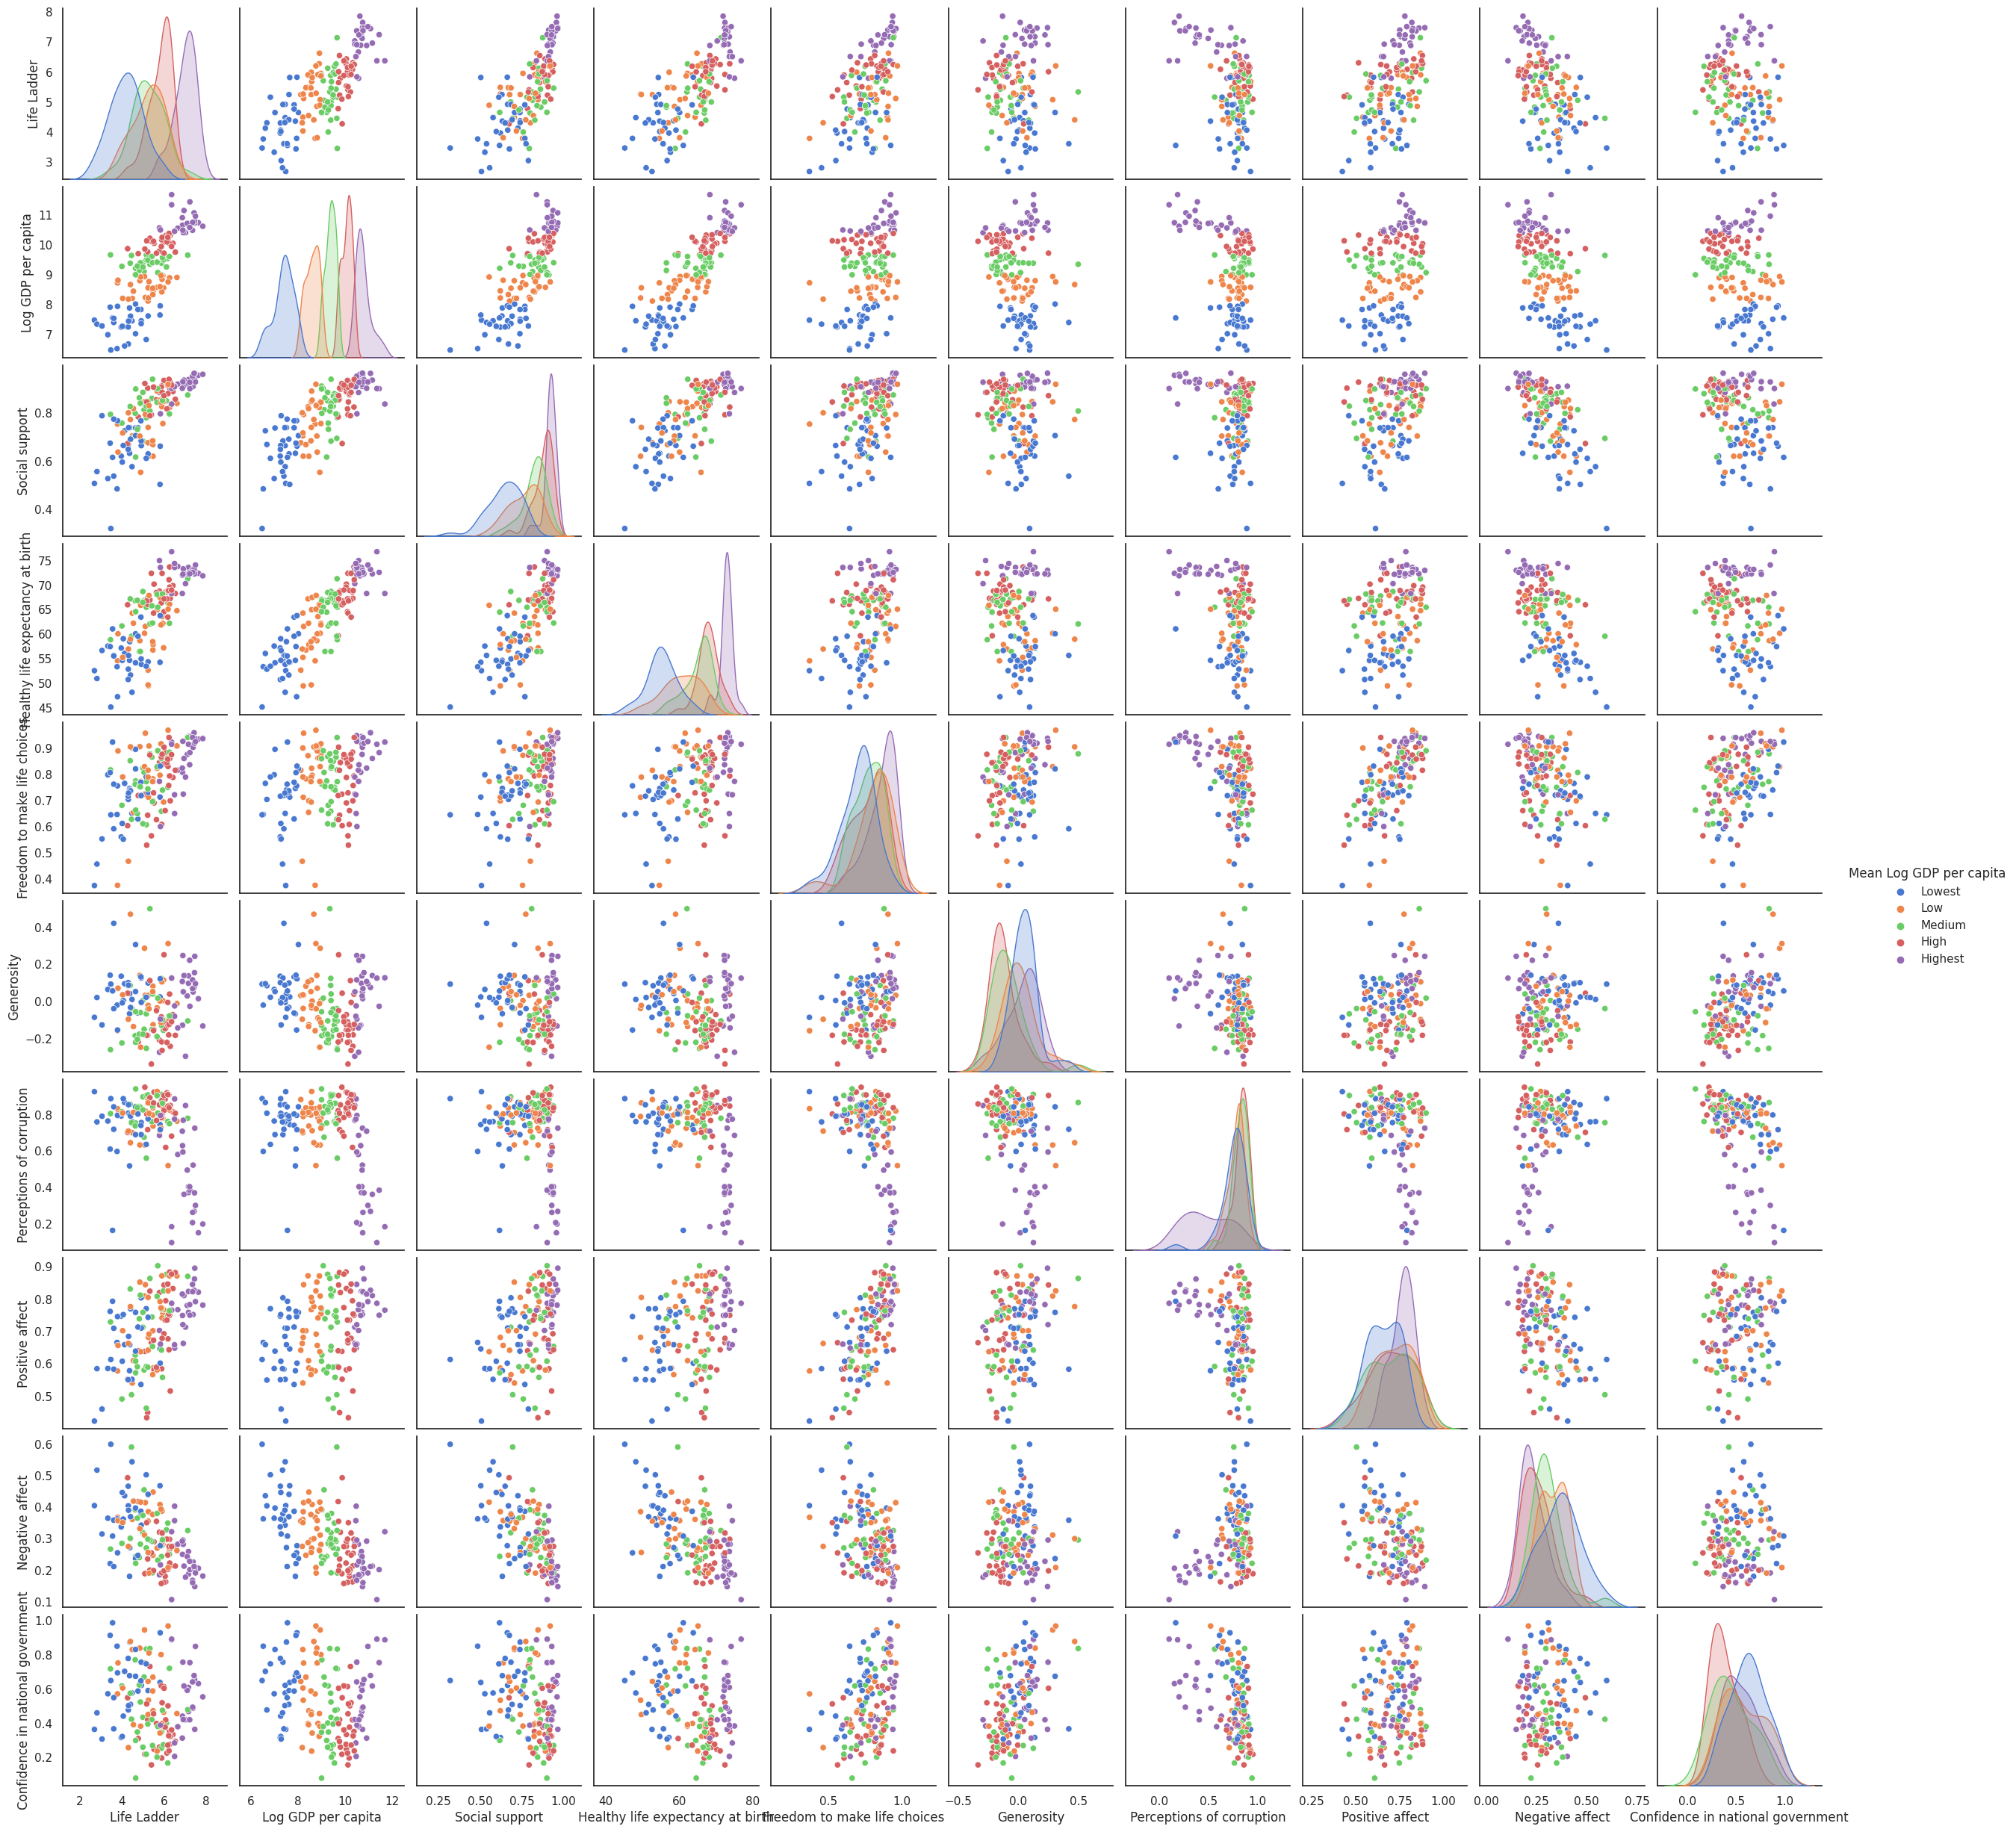

In [15]:
sns.set(
    style="white",
    palette="muted",
    color_codes=True
)
sns.pairplot(
    data[data.Year == 2018][[
        'Life Ladder','Log GDP per capita',
        'Social support','Healthy life expectancy at birth',
        'Freedom to make life choices','Generosity',
        'Perceptions of corruption', 'Positive affect',
        'Negative affect','Confidence in national government',
        'Mean Log GDP per capita'
    ]].dropna(),
    hue='Mean Log GDP per capita'
)
plt.show()

Фасетные сетки (Facet Grid)
Фасетные сетки в Seaborn — это для меня один из основных аргументов в пользу использования данной библиотеки. С ее помощью можно строить мультиграфики на одном дыхании! Рассматривая матричную диаграмму рассеяния, мы уже видели один из примеров фасетной сетки (функция FacetGrid в Seaborn). Данная функция позволяет создавать множество графиков, сегментированных по переменным. Например, в строках матрицы может быть одна переменная (подушевой ВВП, разбитый на пять категорий), а в колонках другая (континенты).

Для написания кода здесь требуется несколько больше кастомизации (а значит — использования Matplotlib), чем мне бы хотелось, но ничего не поделаешь.


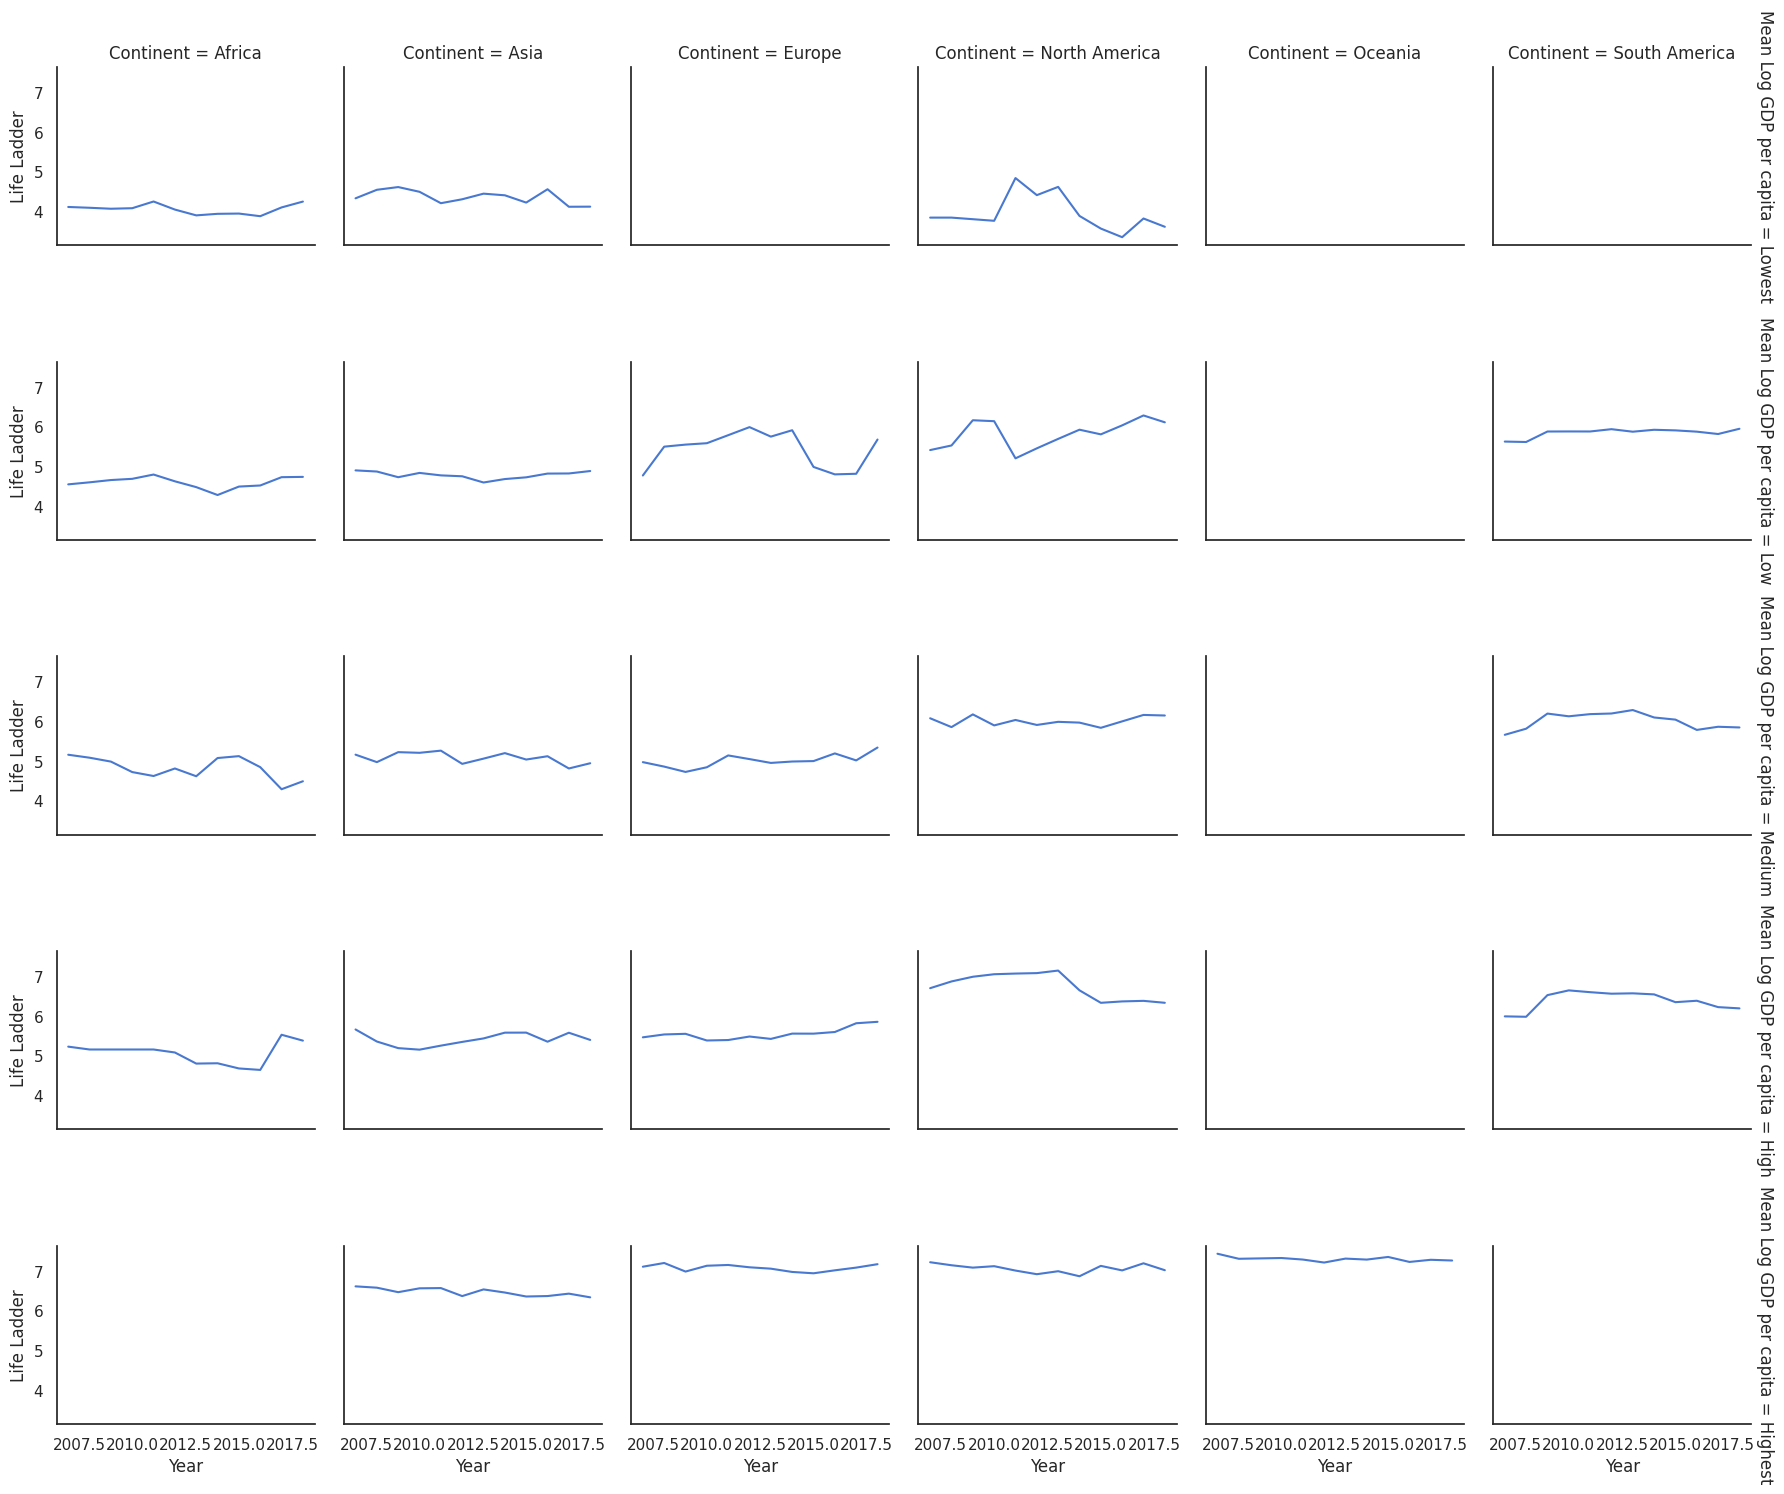

In [16]:
g = sns.FacetGrid(
    data.groupby(['Mean Log GDP per capita','Year','Continent'])['Life Ladder'].mean().reset_index(),
    row='Mean Log GDP per capita',
    col='Continent',
    margin_titles=True
)
g = (g.map(plt.plot, 'Year','Life Ladder'))
plt.show()
#По оси х — логарифм параметра Life Ladder, по оси y — годы. Колонки матрицы — это континенты, а строки — различные уровни (всего их 5) подушевого ВВП.

#FacetGrid — гистограммы

Таким образом, данный код создает набор гистограмм, где каждая гистограмма представляет распределение переменной "Life Ladder" для каждого континента. Графики размещены в виде сетки, где каждая ячейка соответствует отдельному континенту. Это позволяет сравнить распределения переменной "Life Ladder" между различными континентами.

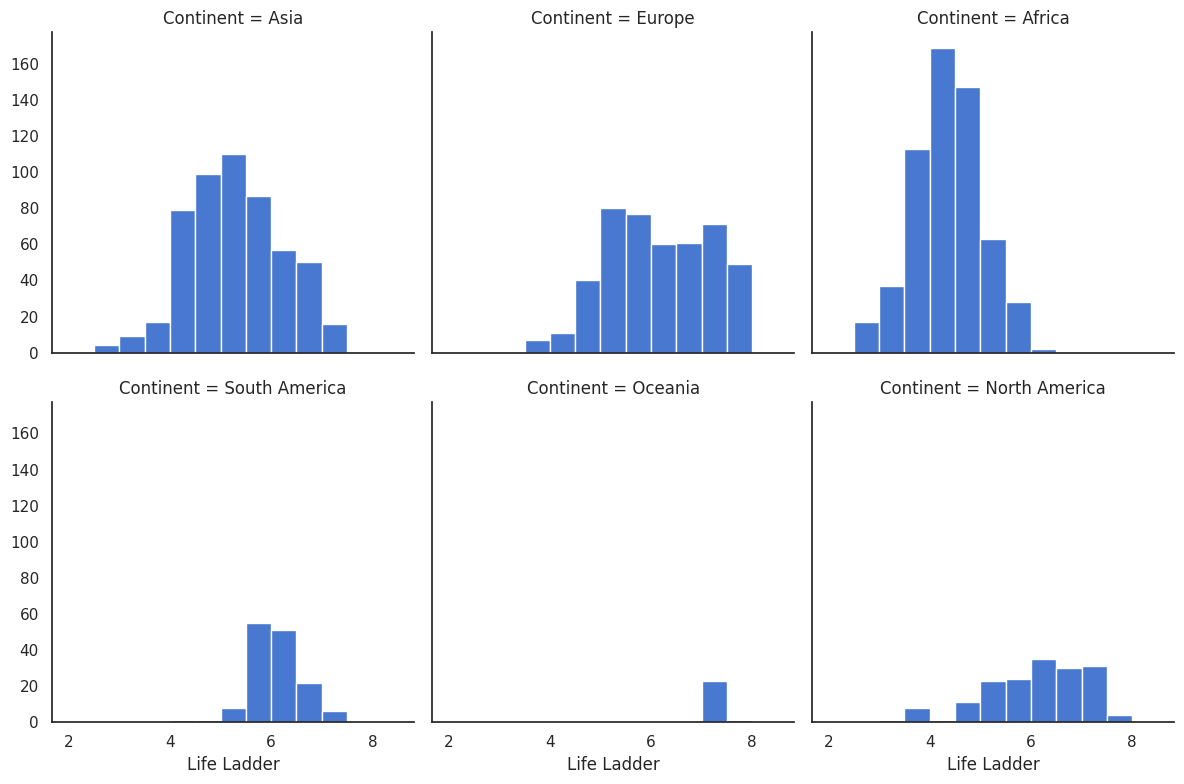

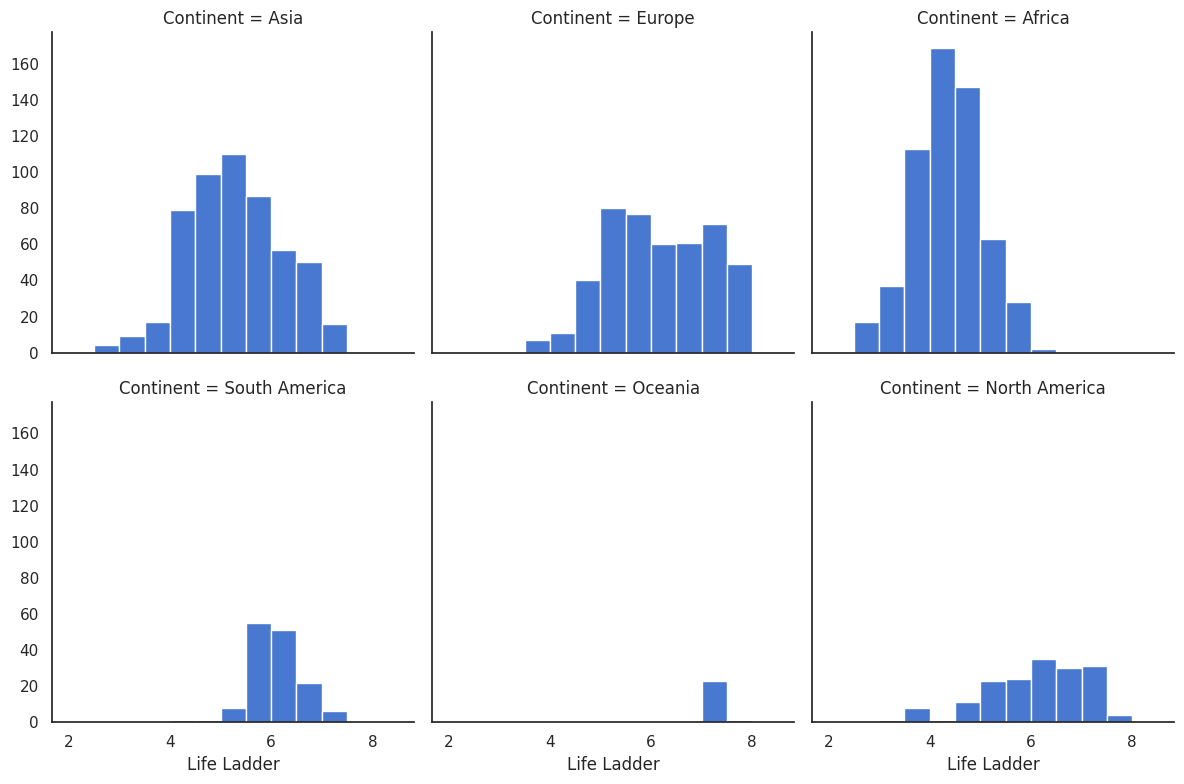

In [18]:
g = sns.FacetGrid(data, col="Continent", col_wrap=3,height=4)
g = (g.map(plt.hist, "Life Ladder",bins=np.arange(2,9,0.5)))
plt.show()

#FacetGrid
— графики ядерной оценки плотности вероятности с аннотацией
Также возможно добавить в каждый график, находящийся в фасетной сетке, свою специфичную аннотацию. В следующем примере мы добавляем математическое ожидание и дисперсию, а также вертикальную пунктирную линию, проходящую через значение математического ожидания.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_a

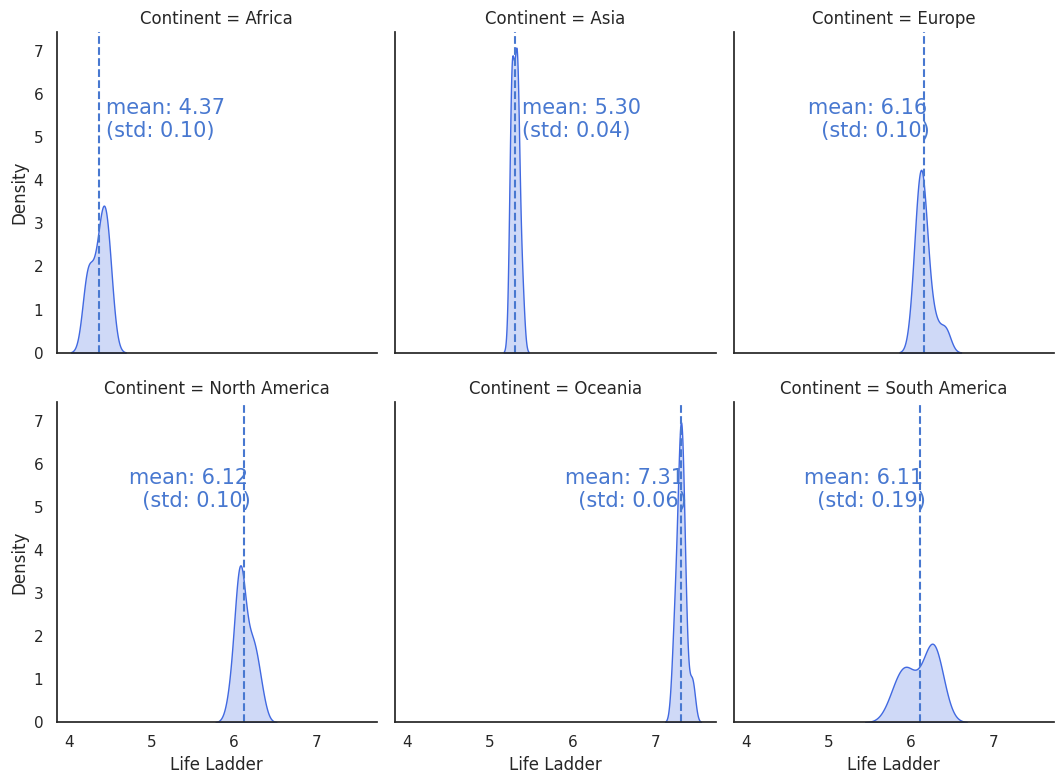

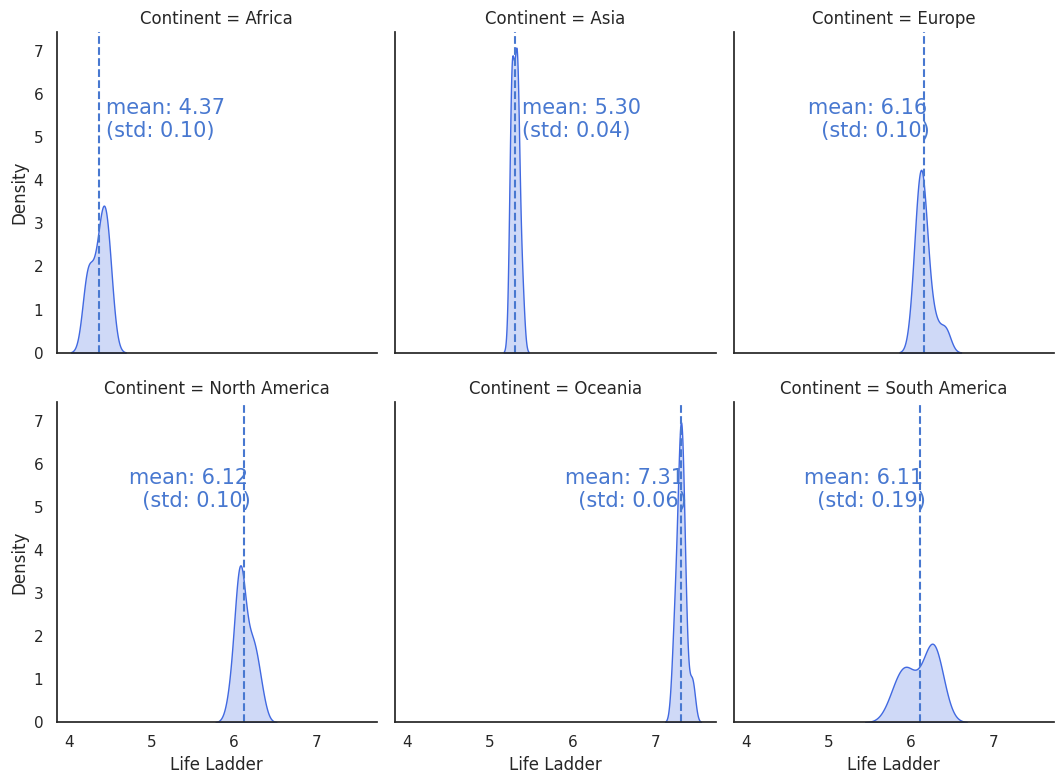

In [20]:
def vertical_mean_line(x, **kwargs):
    plt.axvline(x.mean(), linestyle ="--",
                color = kwargs.get("color", "r"))
    txkw = dict(size=15, color = kwargs.get("color", "r"))

    label_x_pos_adjustment = 0.08 # в зависимости от ваших данных может потребоваться кастомизация
    label_y_pos_adjustment = 5 # в зависимости от ваших данных может потребоваться кастомизация
    if x.mean() < 6: # this needs customization based on your data
        tx = "mean: {:.2f}\n(std: {:.2f})".format(x.mean(),x.std())
        plt.text(x.mean() + label_x_pos_adjustment, label_y_pos_adjustment, tx, **txkw)
    else:
        tx = "mean: {:.2f}\n  (std: {:.2f})".format(x.mean(),x.std())
        plt.text(x.mean() -1.4, label_y_pos_adjustment, tx, **txkw)

_ = data.groupby(['Continent','Year'])['Life Ladder'].mean().reset_index()

g = sns.FacetGrid(_, col="Continent", height=4, aspect=0.9, col_wrap=3, margin_titles=True)
g.map(sns.kdeplot, "Life Ladder", shade=True, color='royalblue')
g.map(vertical_mean_line, "Life Ladder")
plt.show()

FacetGrid — температурные карты
Один из моих любимых графиков — это температурные карты, упакованные в фасетные сетки. Этот тип графика очень полезен, когда нужно визуализировать четыре различные переменные в одной картинке. Код выглядит несколько громоздким, но он может быть легко приспособлен под ваши нужды. Также важно заметить, что подобный тип графиков требует сравнительно большого объема данных и хорошей сегментации. Пропуски в данных здесь обрабатываются плохо.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


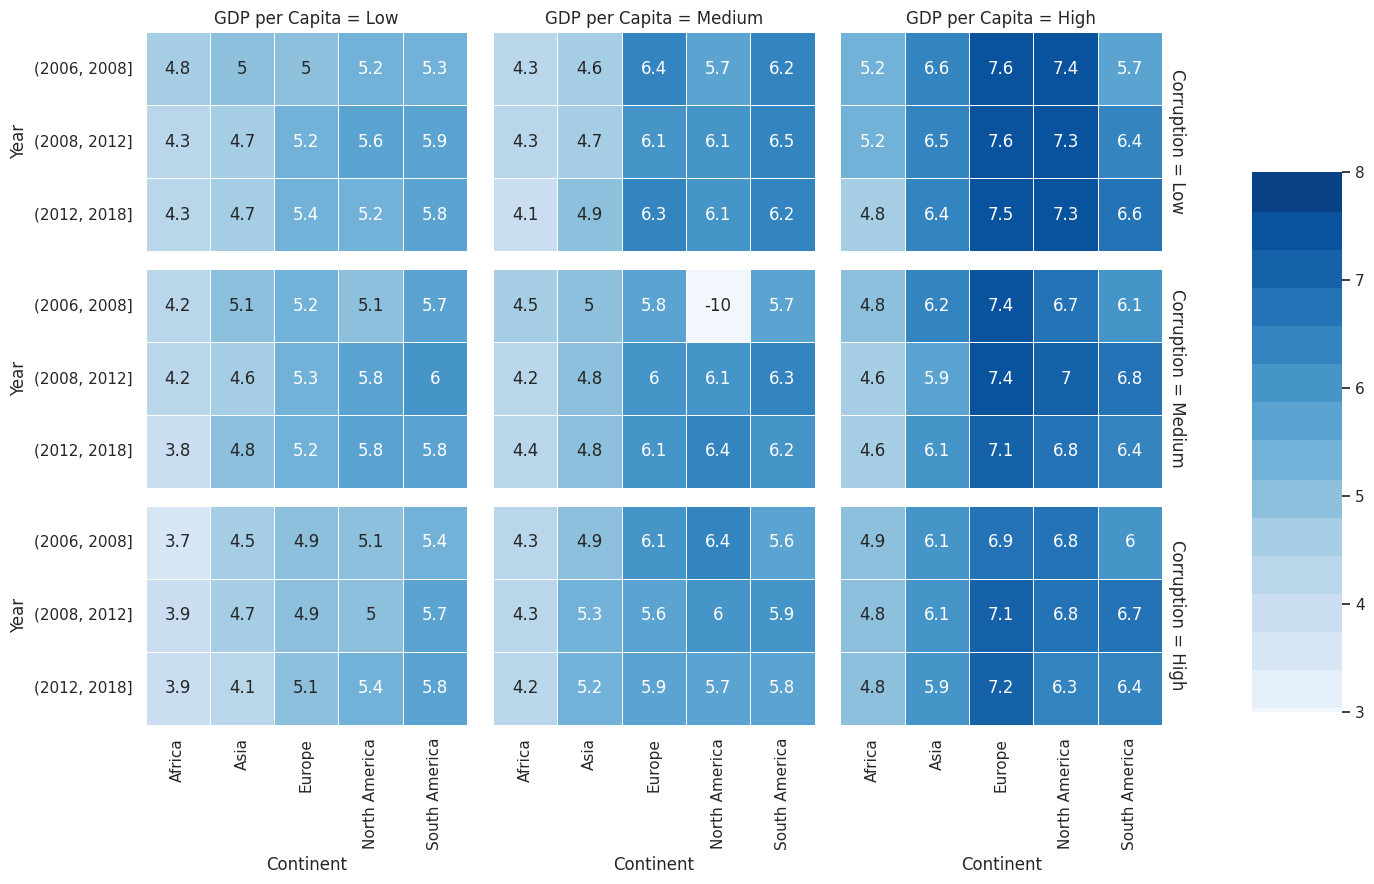

In [21]:
def draw_heatmap(data,inner_row, inner_col, outer_row, outer_col, values, vmin,vmax):
    sns.set(font_scale=1)
    fg = sns.FacetGrid(
        data,
        row=outer_row,
        col=outer_col,
        margin_titles=True
    )

    position = left, bottom, width, height = 1.4, .2, .1, .6
    cbar_ax = fg.fig.add_axes(position)

    fg.map_dataframe(
        draw_heatmap_facet,
        x_col=inner_col,
        y_col=inner_row,
        values=values,
        cbar_ax=cbar_ax,
        vmin=vmin,
        vmax=vmax
    )

    fg.fig.subplots_adjust(right=1.3)
    plt.show()

def draw_heatmap_facet(*args, **kwargs):
    data = kwargs.pop('data')
    x_col = kwargs.pop('x_col')
    y_col = kwargs.pop('y_col')
    values = kwargs.pop('values')
    d = data.pivot(index=y_col, columns=x_col, values=values)
    annot = round(d,4).values
    cmap = sns.color_palette("Blues",30) + sns.color_palette("Blues",30)[0::2]
    #cmap = sns.color_palette("Blues",30)
    sns.heatmap(
        d,
        **kwargs,
        annot=annot,
        center=0,
        cmap=cmap,
        linewidth=.5
    )

# Data preparation
_ = data.copy()
_['Year'] = pd.cut(_['Year'],bins=[2006,2008,2012,2018])

_['GDP per Capita'] = _.groupby(['Continent','Year'])['Log GDP per capita'].transform(
    pd.qcut,
    q=3,
    labels=(['Low','Medium','High'])
).fillna('Low')

_['Corruption'] = _.groupby(['Continent','GDP per Capita'])['Perceptions of corruption'].transform(
    pd.qcut,
    q=3,
    labels=(['Low','Medium','High'])
)

_ = _[_['Continent'] != 'Oceania'].groupby(['Year','Continent','GDP per Capita','Corruption'])['Life Ladder'].mean().reset_index()
_['Life Ladder'] = _['Life Ladder'].fillna(-10)

draw_heatmap(
    data=_,
    outer_row='Corruption',
    outer_col='GDP per Capita',
    inner_row='Year',
    inner_col='Continent',
    values='Life Ladder',
    vmin=3,
    vmax=8,
)
plt.show()

Фасетная тепловая карта, визиализирующая уровень счастья в зависимости от подушевого ВВП, уровня коррупции, времени (годов) и континентов. Мы видим, что счастье увеличивается в правом верхнем углу (то есть, где высокий подушевой ВВП и низкая воспринимаемая коррупция). Влияние времени не определено, но видно, что некоторые континенты (Европа и Северная Америка) заметно счастливей Африки.

#Plotly

Точечный график (диаграмма рассеяния)
С помощью библиотеки Plotly графики строятся следующим образом. Создаем переменную fig = x.<PLOT TYPE>(PARAMS), а затем запускаем функцию fig.show().

In [25]:
fig = px.scatter(
    data_frame=data,
    x="Log GDP per capita",
    y="Life Ladder",
    animation_frame="Year",
    animation_group="Country name",
    size="Gapminder Population",
    color="Continent",
    hover_name="Country name",
    facet_col="Continent",
    size_max=45,
    category_orders={'Year':list(range(2007,2019))}
)
fig.show()

Параллельные категории — прикольный способ визуализировать категоральные переменные


In [26]:
def q_bin_in_3(col):
    return pd.qcut(
        col,
        q=3,
        labels=['Low','Medium','High']
    )
_ = data.copy()
_['Social support'] = _.groupby('Year')['Social support'].transform(q_bin_in_3)
_['Life Expectancy'] = _.groupby('Year')['Healthy life expectancy at birth'].transform(q_bin_in_3)
_['Generosity'] = _.groupby('Year')['Generosity'].transform(q_bin_in_3)
_['Perceptions of corruption'] = _.groupby('Year')['Perceptions of corruption'].transform(q_bin_in_3)
_ = _.groupby(['Social support','Life Expectancy','Generosity','Perceptions of corruption'])['Life Ladder'].mean().reset_index()
fig = px.parallel_categories(_, color="Life Ladder", color_continuous_scale=px.colors.sequential.Inferno)
fig.show()

Столбчатые диаграммы — пример интерактивных фильтров


In [27]:
fig = px.bar(
    data,
    x="Continent",
    y="Gapminder Population",
    color="Mean Log GDP per capita",
    barmode="stack",
    facet_col="Year",
    category_orders={"Year": range(2007,2019)},
    hover_name='Country name',
    hover_data=[
        "Mean Log GDP per capita",
        "Gapminder Population",
        "Life Ladder"
    ]
)
fig.show()

Сюжетный график — как уровень счастья меняется со временем

In [28]:

fig = px.choropleth(
    data,
    locations="ISO3",
    color="Life Ladder",
    hover_name="Country name",
    animation_frame="Year")
fig.show()